## **Intialization**


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv('https://query.data.world/s/geuoefgsjpjncg6y34knuurds2sj7p')


## **Exploratory data analysis**


In [0]:
df.columns

In [0]:
#Region wise units sold

RegionWiseUnitsSold = df.groupby('Region')['Units Sold'].sum().reset_index()

plt.gcf().set_size_inches(20,6)
sns.barplot(y="Units Sold", x="Region",data=RegionWiseUnitsSold)

In [0]:
#Item Type wise units sold

ItemTypeWiseUnitsSold = df.groupby('Item Type')['Units Sold'].sum().reset_index()

plt.gcf().set_size_inches(20,6)
sns.barplot(y="Units Sold", x="Item Type",data=ItemTypeWiseUnitsSold)

In [0]:
#number of different items orderd in different regions

ymin = 99999999
ymax = 0

#getting max and min value of units sold
for r in df['Region'].unique():
    data = df[df['Region']==r].groupby('Item Type')['Units Sold'].sum().reset_index()
    if min(data['Units Sold']) < ymin:
        ymin = min(data['Units Sold'])
    if max(data['Units Sold']) > ymax:
        ymax = max(data['Units Sold'])
    
#plotting separate bar plot for each region showing number of units sold
for r in df['Region'].unique():
    print(r)
    data = df[df['Region']==r].groupby('Item Type')['Units Sold'].sum().reset_index()
    plt.gcf().set_size_inches(20,6)
    plt.ylim(ymin,ymax)
    sns.barplot(y='Units Sold',x='Item Type',data=data)
    plt.show()

In [0]:
#Creating two new columns of year and month

df['Year'] = df['Order Date'].apply(lambda x:int(x.split('/')[2]))
df['Month'] = df['Order Date'].apply(lambda x:int(x.split('/')[0]))
df['Year'] = df['Year'].astype('int')
df['Month'] = df['Month'].astype('int')

In [0]:
ymin = 99999999
ymax = 0

df = df.sort_values('Year')
#getting max and min value of units sold
for y in df['Year'].unique():
    data = df[df['Year'] == y].groupby('Month')['Units Sold'].sum().reset_index()
    if min(data['Units Sold']) < ymin:
        ymin = min(data['Units Sold'])
    if max(data['Units Sold']) > ymax:
        ymax = max(data['Units Sold'])

#number of items sold for every month for every year
for y in df['Year'].unique():
    print(y)
    data =  df[df['Year'] == y].groupby('Month')['Units Sold'].sum().reset_index()
    plt.gcf().set_size_inches(20,6)
    plt.ylim(ymin,ymax)
    sns.barplot(y='Units Sold',x='Month',data=data)
    plt.show()

In [0]:
#Year wise total profit

YearWiseProfit = df.groupby('Year')['Total Profit'].sum().reset_index()
plt.gcf().set_size_inches(20,6)
sns.barplot(y='Total Profit',x='Year',data=YearWiseProfit)
plt.show()

In [0]:
#from above graphs we can see there is missing data for 2017
#se we can use the data of 2017 as our target year and compare the predicted value

Baby Food


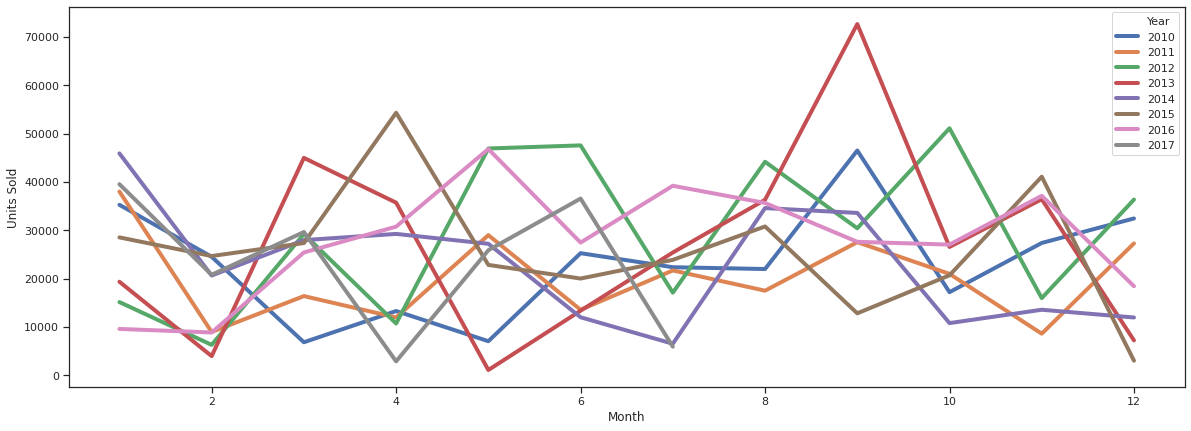

Snacks


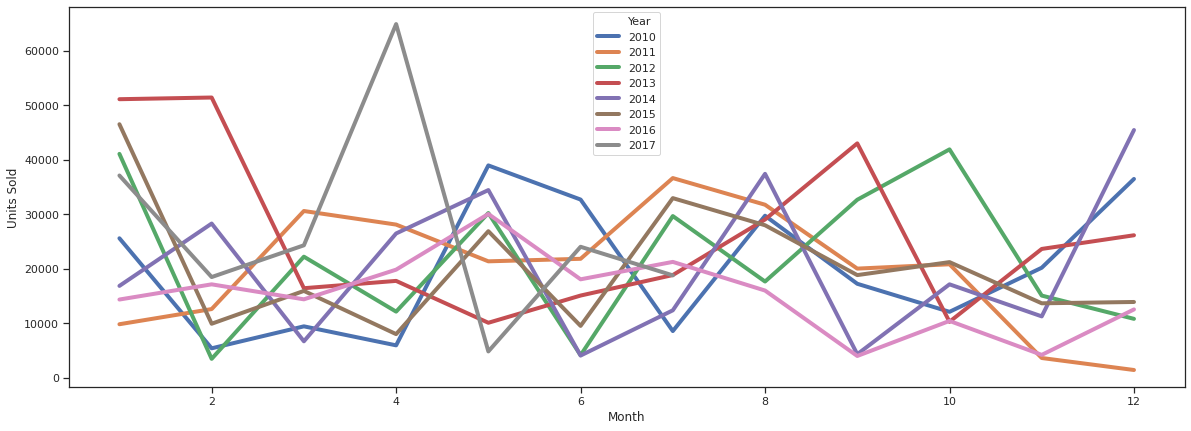

Beverages


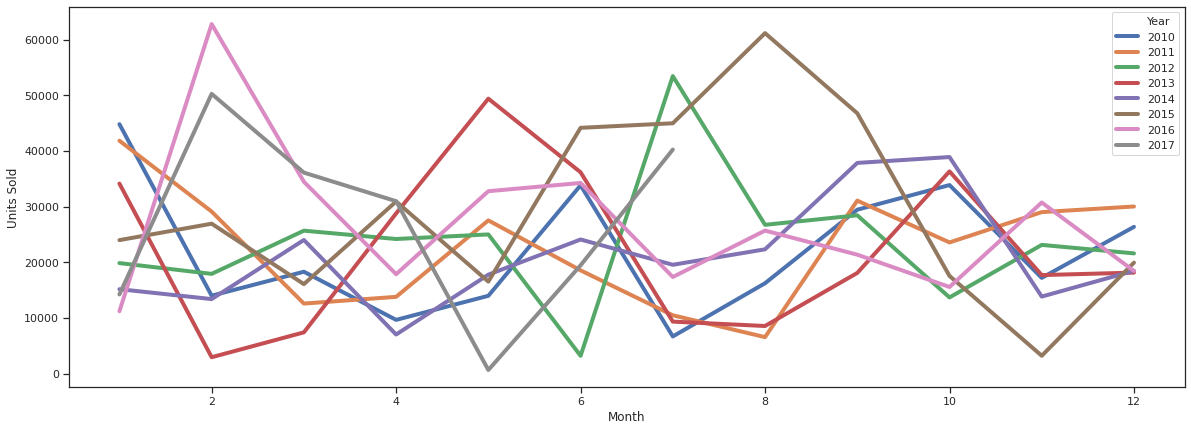

Cereal


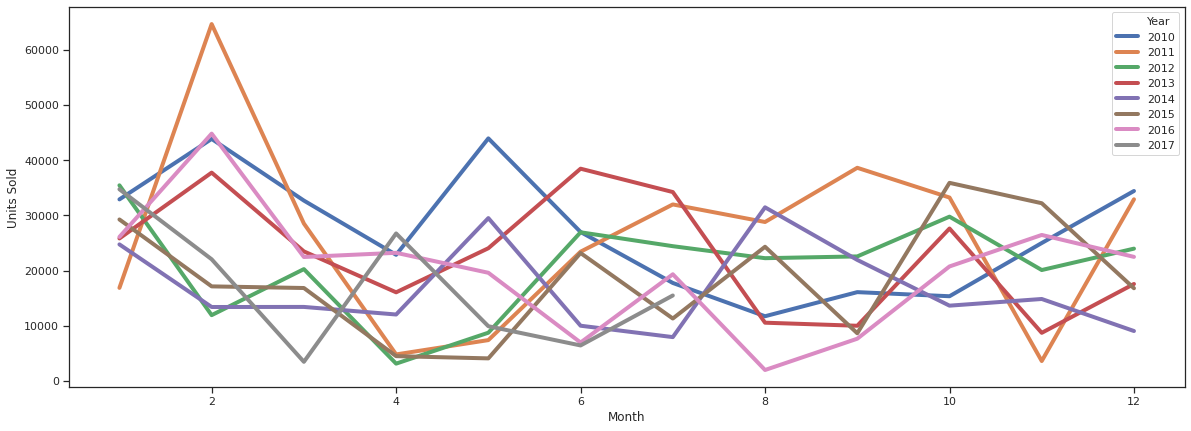

Personal Care


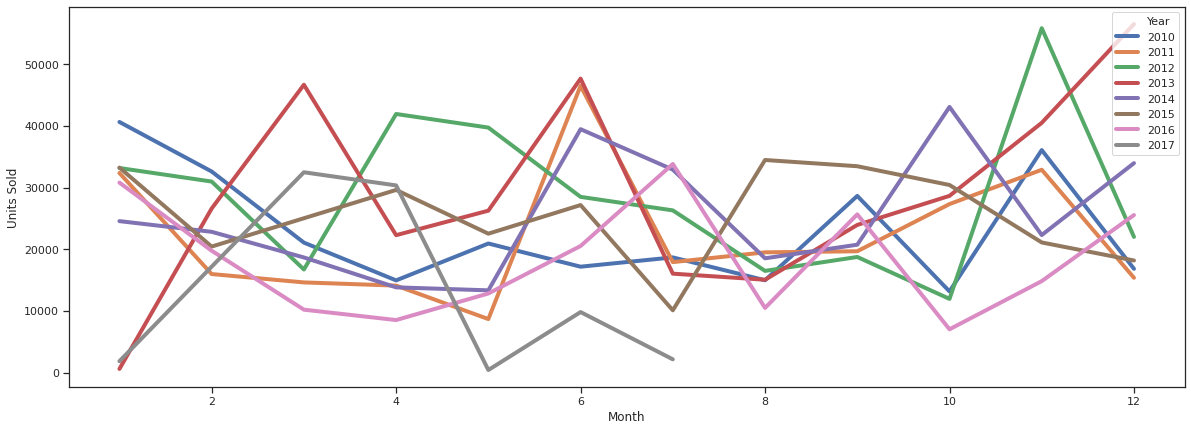

Clothes


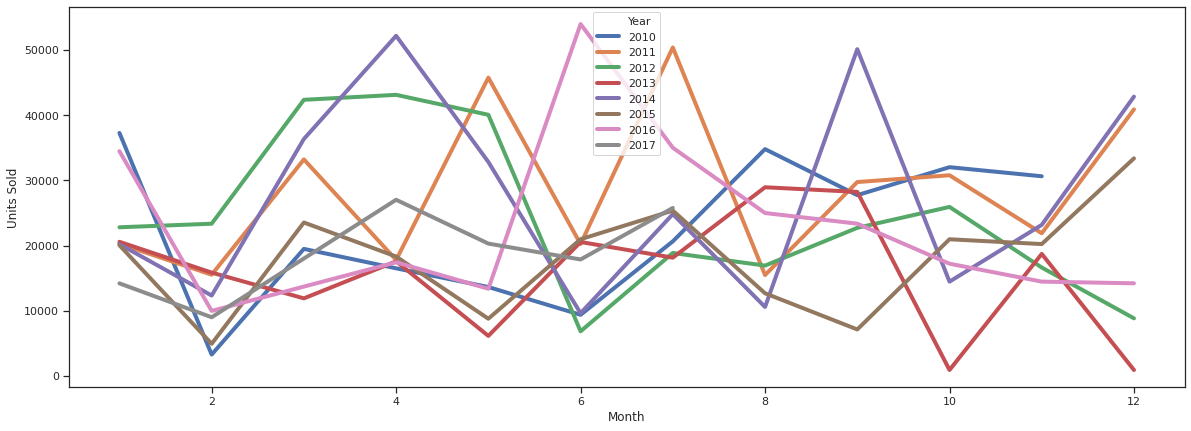

Office Supplies


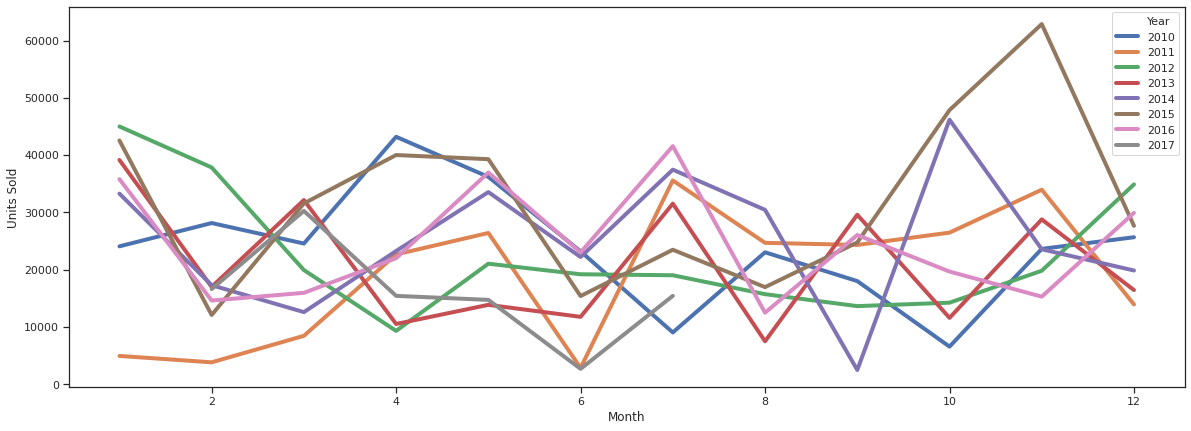

Cosmetics


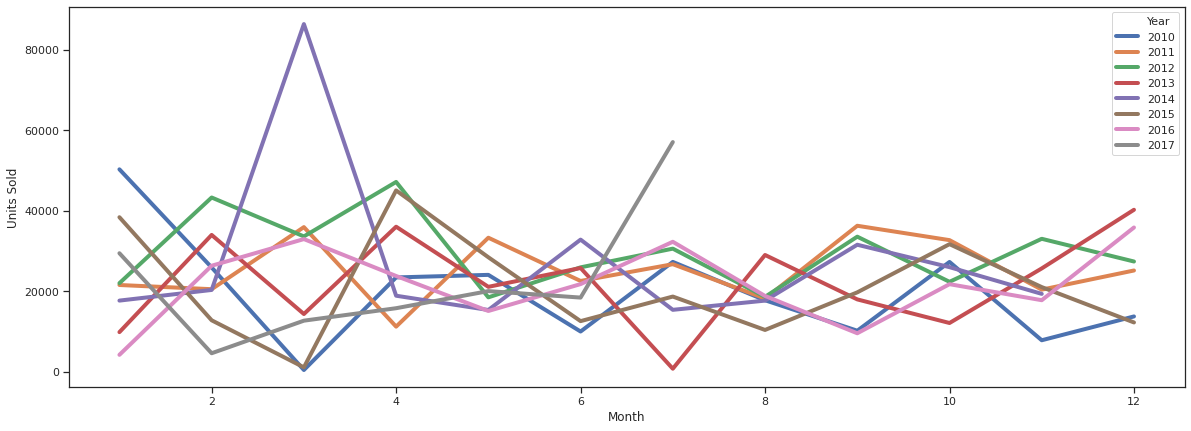

Meat


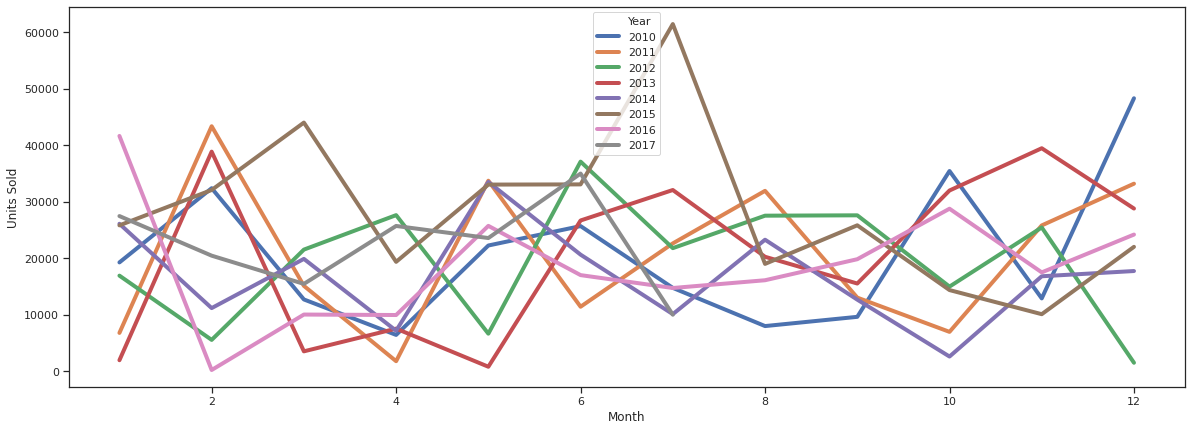

Fruits


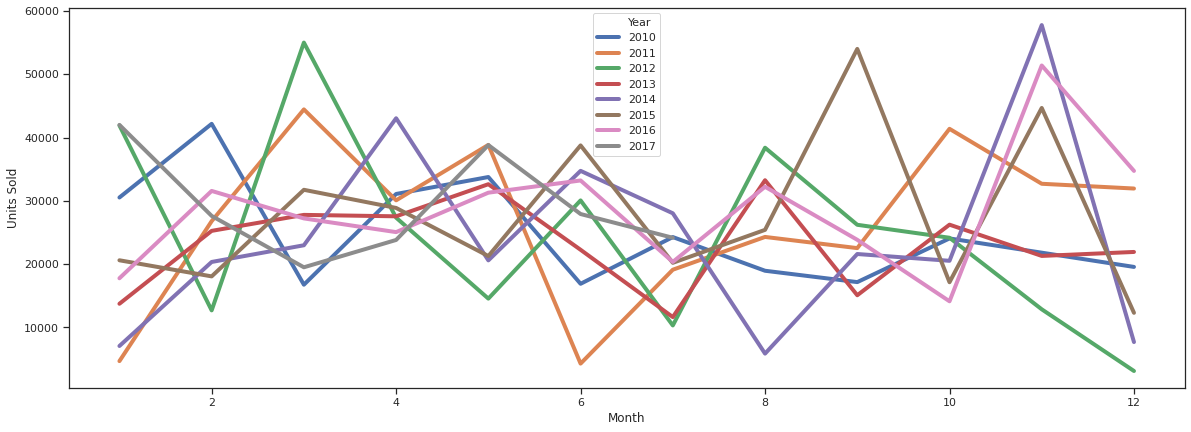

Vegetables


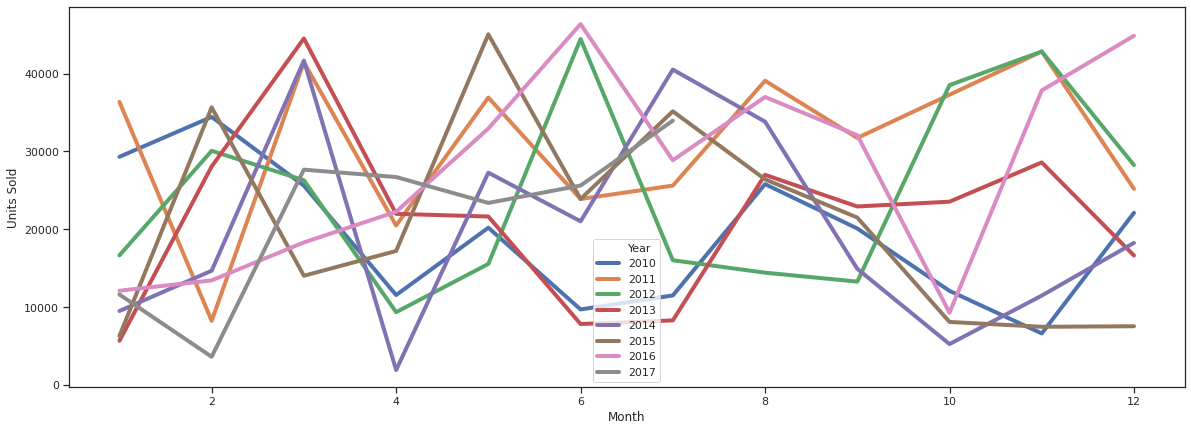

Household


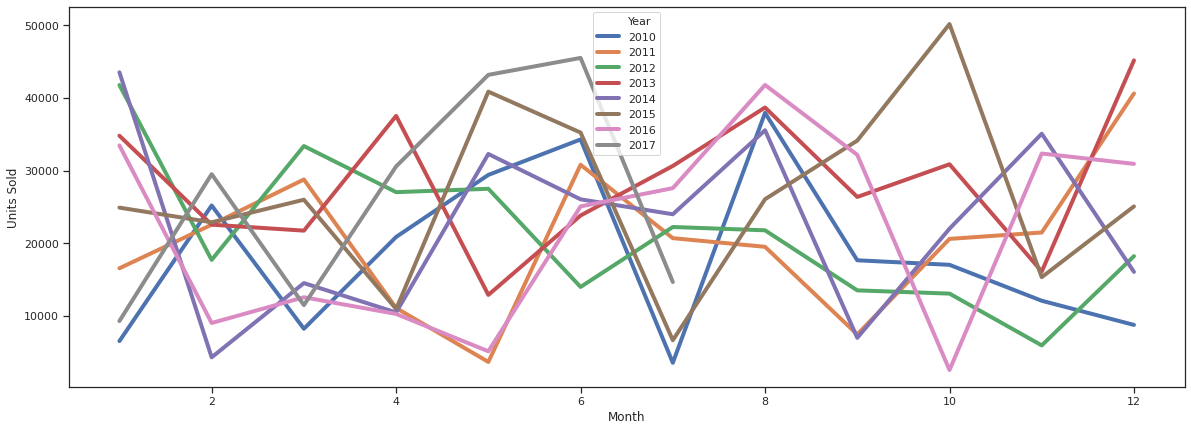

In [422]:
#Units sold trend for different item type

data = df[['Item Type','Month','Year','Units Sold']]
#data['Order Date'] = pd.to_datetime(data['Order Date'])


for i in data['Item Type'].unique():
    print(i)
    data1 = data[data['Item Type'] == i]
    data1 = data1.groupby(['Year','Month'])['Units Sold'].sum().reset_index()
    plt.gcf().set_size_inches(20,7)
    palette = palette ={2010:"C0",2011:"C1",2012:"C2", 2013:"C3",2014:"C4",2015:"C5",2016:"C6",2017:"C7"}
    sns.set(style="ticks", rc={"lines.linewidth":4})
    sns.lineplot(x='Month',y='Units Sold',hue = 'Year',data=data1,palette = palette)
    plt.show()

## **Missing Value Analysis**

In [0]:
df2.isnull().sum()

#there is no null values

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
Year              0
Month             0
dtype: int64

## **Outlier Analysis**

In [0]:
for c in df2.columns:
    try:
        print(c)
        plt.gcf().set_size_inches(5,10)
        sns.boxplot(data = df2[c])
        plt.show()
    except:
        pass

#As there is outliers in revenue cost and profit section
#these sections are not required for the model

## **Feature Selection**

In [0]:
df.columns

In [0]:
#we need to predict the future sales for each Item Type
#so selecting only Item Type, Order Date and Number of Unite sold

df1 = df[['Item Type','Month','Year','Units Sold']]
df1['Month'] = df1['Year'].astype(str) + "-" + df1['Month'].astype(str) 

df2 = df1[['Item Type','Month','Units Sold']]
df2['Month'] = pd.to_datetime(df2['Month'])

df2 = df2.groupby(['Month','Item Type'])['Units Sold'].sum().reset_index()
#df2.sort_values(by=['Order Date','Item Type']).head(50)


In [0]:
#creating different dataframes for different item types

dfs = {}
for i in df2['Item Type'].unique():
    data = df2[df2['Item Type'] == i]
    data = data.drop('Item Type',axis = 1)
    data.set_index('Month',inplace = True)
    dfs[i] = data


## **ARIMA model**

In [0]:
from statsmodels.tsa.stattools import adfuller
adfuller(dfs['Baby Food']['Units Sold'])

In [0]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [0]:
ax1 = plt.figure(figsize=(12,8)).add_subplot(211)
plot_acf(dfs['Baby Food']['Units Sold'],lags = 40,ax = ax1)
ax2 = plt.figure(figsize=(12,8)).add_subplot(212)
plot_pacf(dfs['Baby Food']['Units Sold'],lags = 40,ax = ax2)

In [0]:
from statsmodels.tsa.arima_model import ARIMA

In [0]:
data = dfs['Beverages'].copy()
model = ARIMA(data['Units Sold'],order = (1,1,0))
model_fit = model.fit()

In [0]:
data['fo'] = model_fit.predict()
data[['Units Sold','fo']].plot()

## **SARIMAX model**

In [0]:
import statsmodels.api as sm

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Baby Food


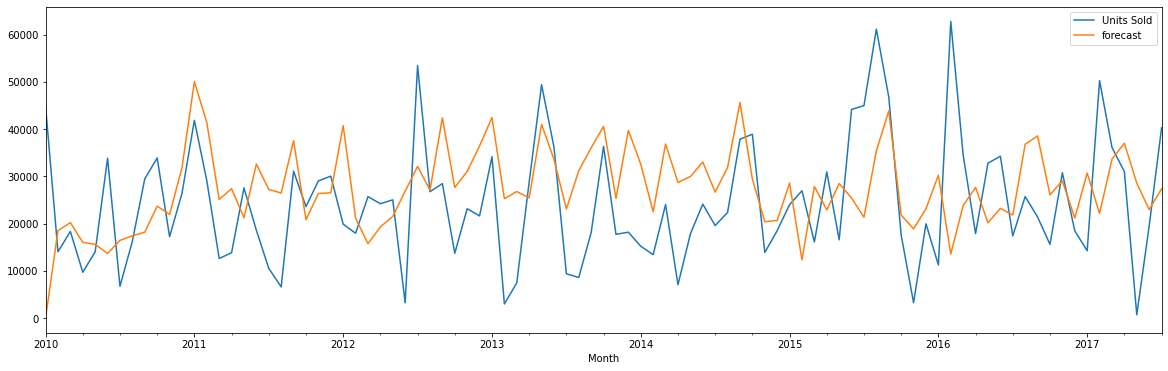

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Beverages


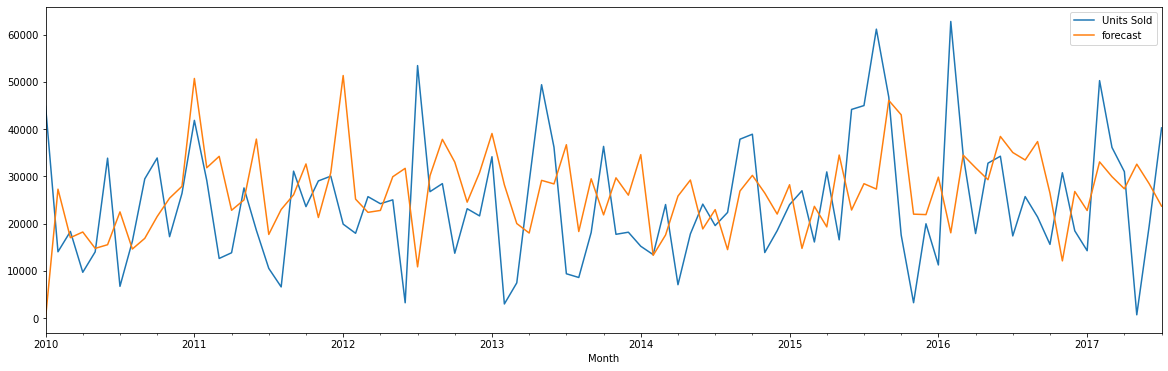

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Cereal


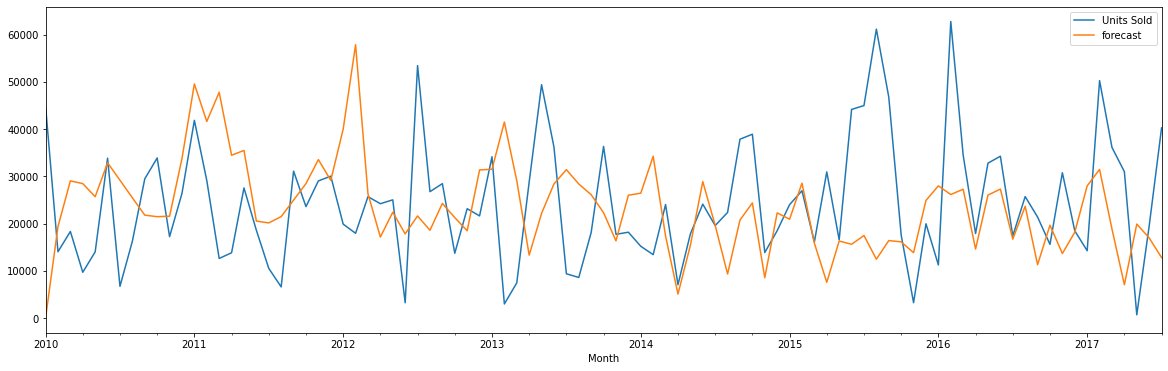

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Clothes


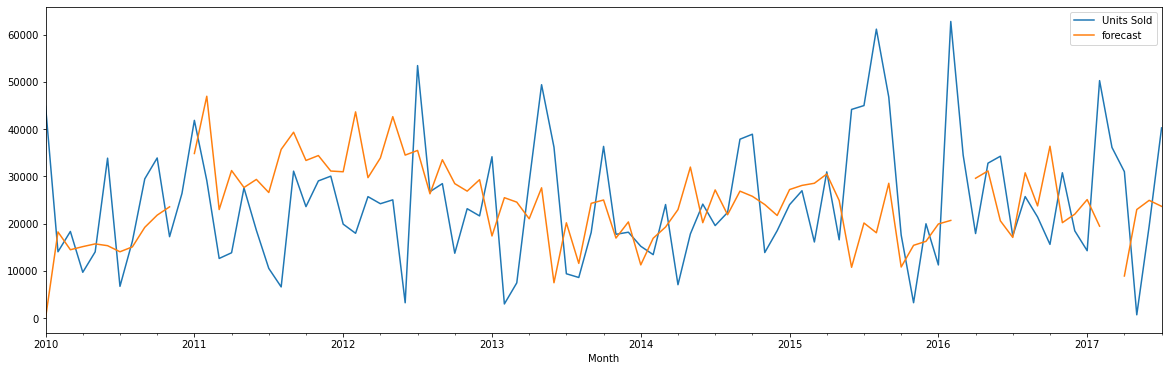

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Cosmetics


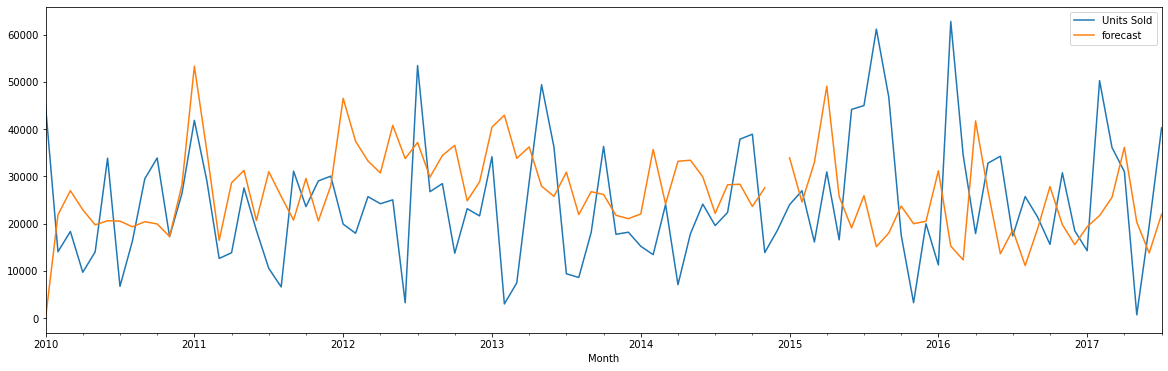

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Fruits


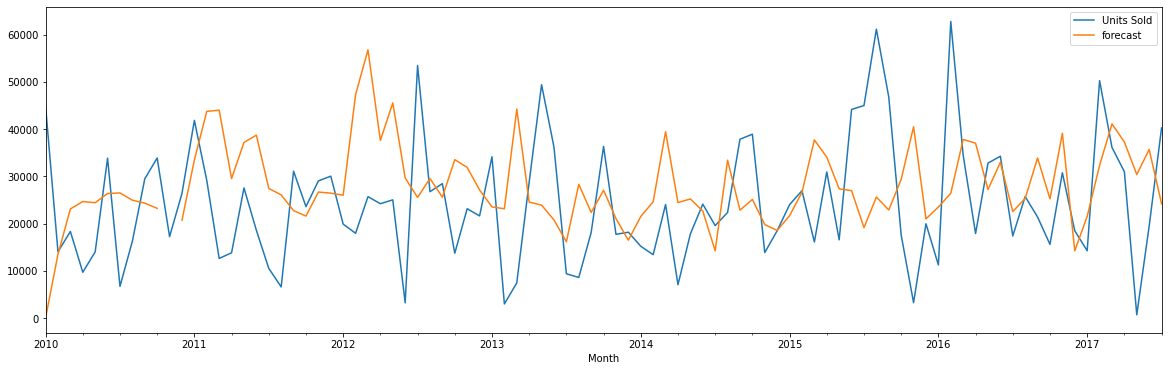

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Household


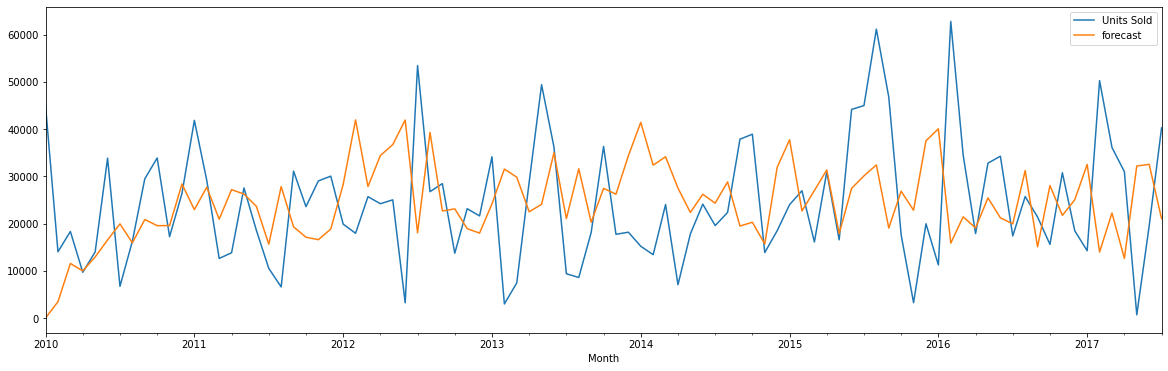

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Meat


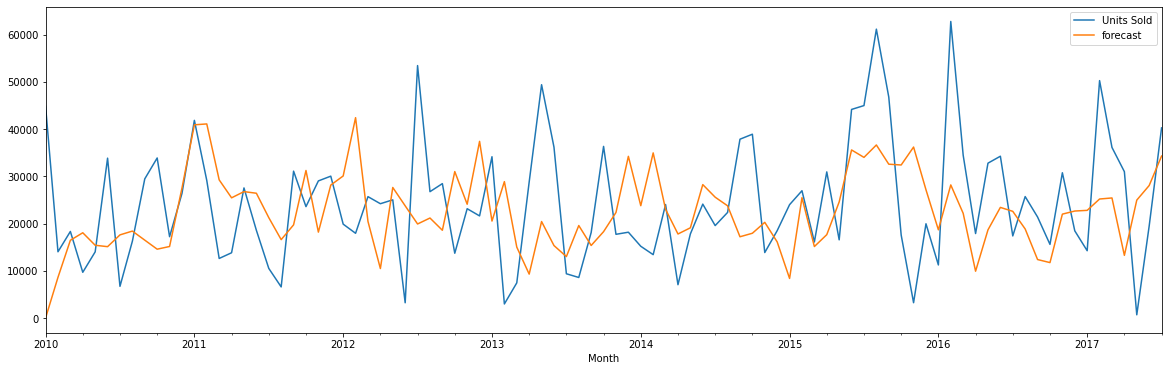

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Office Supplies


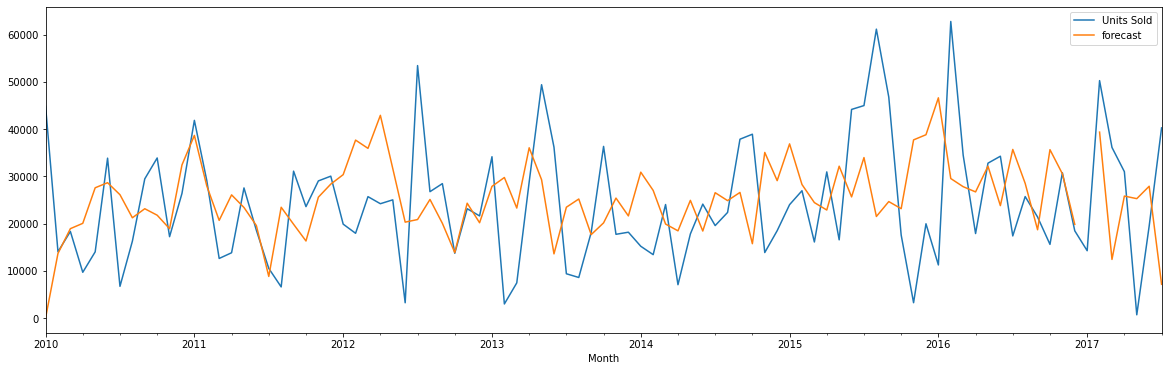

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Personal Care


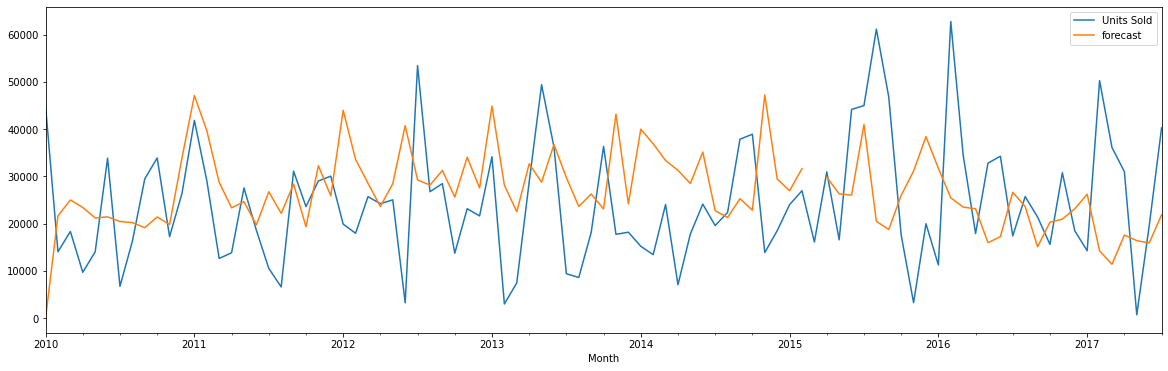

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Snacks


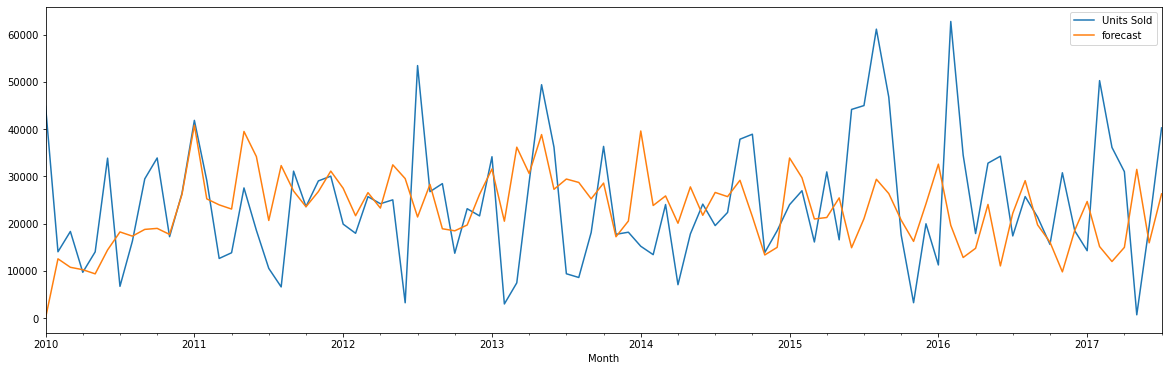

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Vegetables


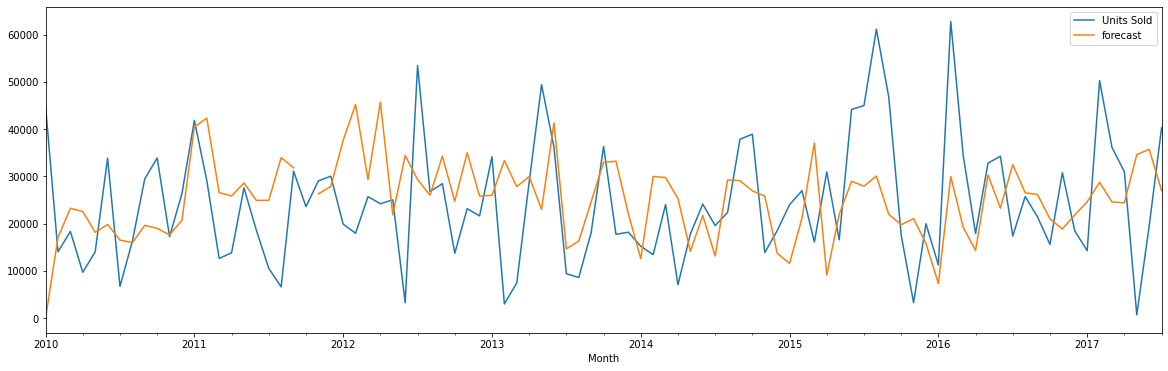

In [408]:
for Item in dfs: 
    model = sm.tsa.statespace.SARIMAX(dfs[Item]['Units Sold'],order= (1,1,1),seasonal_order=(1,1,1,12))
    result = model.fit()
    data['forecast'] = result.predict()#(start='2017-01-01',end = len(data))
    print(Item)
    data[['Units Sold','forecast']].plot(figsize = (20,6))
    plt.show()